# 라이브러리

In [1]:
import numpy as np 
import pandas as pd 

# 데이터 불러오기

In [2]:
train = pd.read_csv('C:/Users/bsh36/Desktop/Data/shelter/train.csv')
test = pd.read_csv('C:/Users/bsh36/Desktop/Data/shelter/test.csv')
sub = pd.read_csv('C:/Users/bsh36/Desktop/Data/shelter/sample_submission.csv')

In [3]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


# 전처리

In [5]:
alldata = pd.concat([train,test])
alldata

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,ID
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,NaN
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,NaN
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,NaN
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,NaN
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11451,NaN,NaN,2014-07-08 14:50:00,NaN,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,11452.0
11452,NaN,NaN,2014-10-21 12:57:00,NaN,NaN,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue,11453.0
11453,NaN,NaN,2014-09-29 09:00:00,NaN,NaN,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico,11454.0
11454,NaN,Rambo,2015-09-05 17:16:00,NaN,NaN,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan,11455.0


In [6]:
alldata['DateTime'] = pd.to_datetime(alldata['DateTime'])
alldata['Year'] = alldata['DateTime'].dt.year
alldata['Month'] = alldata['DateTime'].dt.month
alldata['Dayofweek'] = alldata['DateTime'].dt.dayofweek
alldata['Week'] = alldata['DateTime'].dt.week
alldata['Day'] = alldata['DateTime'].dt.day
alldata['Hour'] = alldata['DateTime'].dt.hour
alldata['Minute'] = alldata['DateTime'].dt.minute
alldata['Period'] = alldata['DateTime'].dt.date - alldata['DateTime'].dt.date.min()
alldata['Period'] = alldata['Period'].apply(lambda x : x.days)
alldata

c:\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,ID,Year,Month,Dayofweek,Week,Day,Hour,Minute,Period
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,NaN,2014,2,2,7,12,18,22,134
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,NaN,2013,10,6,41,13,12,44,12
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,NaN,2015,1,5,5,31,12,28,487
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,NaN,2014,7,4,28,11,19,9,283
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,NaN,2013,11,4,46,15,12,52,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,NaN,NaN,2014-07-08 14:50:00,NaN,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,11452.0,2014,7,1,28,8,14,50,280
11452,NaN,NaN,2014-10-21 12:57:00,NaN,NaN,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue,11453.0,2014,10,1,43,21,12,57,385
11453,NaN,NaN,2014-09-29 09:00:00,NaN,NaN,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico,11454.0,2014,9,0,40,29,9,0,363
11454,NaN,Rambo,2015-09-05 17:16:00,NaN,NaN,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan,11455.0,2015,9,5,36,5,17,16,704


In [7]:
def age_processing(x):
    if pd.isnull(x):
        # 원래 들어가있던 값과 겹칠수 있음.
        return -1
    num = int(x.split()[0])
    if 'year' in x:
        return num*365
    elif 'month' in x:
        return num*30
    elif 'week' in x:
        return num*7
    else :
        return num*1
alldata['AgeuponOutcome'] = alldata['AgeuponOutcome'].apply(age_processing)
alldata

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,ID,Year,Month,Dayofweek,Week,Day,Hour,Minute,Period
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,NaN,2014,2,2,7,12,18,22,134
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,NaN,2013,10,6,41,13,12,44,12
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,NaN,2015,1,5,5,31,12,28,487
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,NaN,2014,7,4,28,11,19,9,283
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,NaN,2013,11,4,46,15,12,52,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,NaN,NaN,2014-07-08 14:50:00,NaN,NaN,Cat,Neutered Male,60,Domestic Shorthair Mix,Black,11452.0,2014,7,1,28,8,14,50,280
11452,NaN,NaN,2014-10-21 12:57:00,NaN,NaN,Cat,Intact Female,14,Domestic Shorthair Mix,Blue,11453.0,2014,10,1,43,21,12,57,385
11453,NaN,NaN,2014-09-29 09:00:00,NaN,NaN,Cat,Intact Female,365,Domestic Shorthair Mix,Calico,11454.0,2014,9,0,40,29,9,0,363
11454,NaN,Rambo,2015-09-05 17:16:00,NaN,NaN,Dog,Neutered Male,2190,German Shepherd Mix,Black/Tan,11455.0,2015,9,5,36,5,17,16,704


In [8]:
alldata['Has_name'] = alldata['Name'].notnull()

In [9]:
alldata2 = alldata.drop(columns = ['AnimalID', 'DateTime', 'OutcomeType', 'OutcomeSubtype','ID','Name'])
alldata2

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Dayofweek,Week,Day,Hour,Minute,Period,Has_name
0,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,2014,2,2,7,12,18,22,134,True
1,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,2013,10,6,41,13,12,44,12,True
2,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,2015,1,5,5,31,12,28,487,True
3,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,2014,7,4,28,11,19,9,283,False
4,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,2013,11,4,46,15,12,52,45,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,Cat,Neutered Male,60,Domestic Shorthair Mix,Black,2014,7,1,28,8,14,50,280,False
11452,Cat,Intact Female,14,Domestic Shorthair Mix,Blue,2014,10,1,43,21,12,57,385,False
11453,Cat,Intact Female,365,Domestic Shorthair Mix,Calico,2014,9,0,40,29,9,0,363,False
11454,Dog,Neutered Male,2190,German Shepherd Mix,Black/Tan,2015,9,5,36,5,17,16,704,True


c:\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Hour', ylabel='count'>

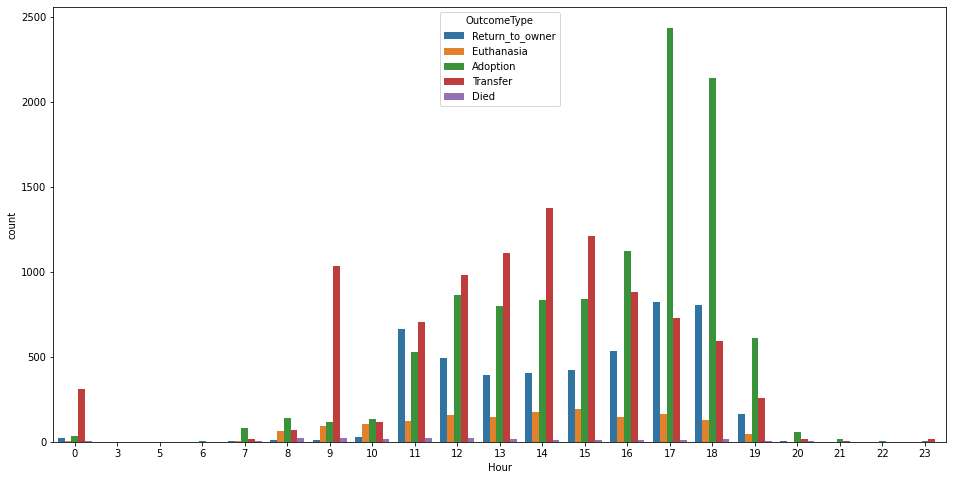

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
# 특정 컬럼이 도움이 되는지 안되는지 알고 싶을때, countplot
# 특정 시간대에 outcometype의 비율이 달라서 hour컬럼은 도움이 된다.
sns.countplot(alldata['Hour'],hue = alldata['OutcomeType'])

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
c = alldata2.columns[alldata2.dtypes==object]
for i in c:
    alldata2[i] = le.fit_transform(alldata2[i])
alldata2

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Dayofweek,Week,Day,Hour,Minute,Period,Has_name
0,1,2,365,1482,146,2014,2,2,7,12,18,22,134,True
1,0,3,365,775,184,2013,10,6,41,13,12,44,12,True
2,1,2,730,1293,97,2015,1,5,5,31,12,28,487,True
3,0,1,21,775,47,2014,7,4,28,11,19,9,283,False
4,1,2,730,1101,311,2013,11,4,46,15,12,52,45,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,0,2,60,775,6,2014,7,1,28,8,14,50,280,False
11452,0,0,14,775,46,2014,10,1,43,21,12,57,385,False
11453,0,0,365,775,156,2014,9,0,40,29,9,0,363,False
11454,1,2,2190,841,40,2015,9,5,36,5,17,16,704,True


In [12]:
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]

In [13]:
np.where(train2.dtypes!=np.float)[0]

c:\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

# 모델링

In [14]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(verbose=100)

In [15]:
cbc.fit(train2, train['OutcomeType'],cat_features=np.where(train2.dtypes!=np.float)[0])

c:\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Learning rate set to 0.093562
0:	learn: 1.4718652	total: 290ms	remaining: 4m 49s
100:	learn: 0.6988735	total: 17s	remaining: 2m 31s
200:	learn: 0.6574269	total: 33.1s	remaining: 2m 11s
300:	learn: 0.6330987	total: 49.4s	remaining: 1m 54s
400:	learn: 0.6123874	total: 1m 5s	remaining: 1m 38s
500:	learn: 0.5929688	total: 1m 22s	remaining: 1m 21s
600:	learn: 0.5766150	total: 1m 38s	remaining: 1m 5s
700:	learn: 0.5594389	total: 1m 55s	remaining: 49.1s
800:	learn: 0.5439268	total: 2m 11s	remaining: 32.7s
900:	learn: 0.5280035	total: 2m 27s	remaining: 16.2s
999:	learn: 0.5123228	total: 2m 44s	remaining: 0us


In [16]:
result = cbc.predict_proba(test2)

In [17]:
pd.Series(cbc.feature_importances_,index=train2.columns).sort_values(ascending = False)

SexuponOutcome    13.544915
AgeuponOutcome    13.508827
Hour              12.451116
Breed             11.069767
Period             7.577363
Color              6.810767
Minute             5.581897
Week               4.753918
Dayofweek          4.588966
Day                4.474928
Year               4.462410
Month              4.292886
Has_name           4.018516
AnimalType         2.863725
dtype: float64

In [18]:
sub.iloc[:,1:] = result
sub

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.009030,0.000418,0.009208,0.041077,0.940267
1,2,0.751766,0.000140,0.015016,0.187632,0.045447
2,3,0.537442,0.002117,0.010837,0.214157,0.235446
3,4,0.263754,0.003635,0.014243,0.187645,0.530722
4,5,0.449381,0.000481,0.010677,0.506699,0.032762
...,...,...,...,...,...,...
11451,11452,0.058820,0.000640,0.001532,0.000972,0.938035
11452,11453,0.000065,0.002104,0.002318,0.000458,0.995055
11453,11454,0.000126,0.000325,0.000685,0.000210,0.998654
11454,11455,0.485339,0.000903,0.026767,0.414864,0.072127


In [19]:
sub.to_csv('C:/Users/bsh36/Desktop/Data/shelter/cbc.csv',index=False)